In [1]:
!pip install -Uq openai-agents

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 734.3/734.3 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.8 MB/s eta 0:00:00


In [2]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
from agents import Agent , Runner , AsyncOpenAI , OpenAIChatCompletionsModel, set_default_openai_client, set_tracing_disabled , set_default_openai_api
from google.colab import userdata
api_key = userdata.get("GOOGLE_API_KEY")

set_tracing_disabled(True)
set_default_openai_api("chat_completions")

external_client = AsyncOpenAI(api_key=api_key , base_url='https://generativelanguage.googleapis.com/v1beta/openai/')
set_default_openai_client(external_client)

model = OpenAIChatCompletionsModel(
    model='gemini-2.0-flash',
    openai_client=external_client
)

In [4]:
agent : Agent = Agent(
    name='Assistant',
    instructions="You are helpful assistant",
    model="gemini-2.0-flash",

)

result = Runner.run_sync(agent , "HI")

print(result.final_output)

Hi there! How can I help you today?



In [5]:
from agents import enable_verbose_stdout_logging, set_tracing_disabled


enable_verbose_stdout_logging()

set_tracing_disabled(False)

agent : Agent = Agent(
    name='Assistant',
    instructions="You are helpful assistant",
    model="gemini-2.0-flash",

)

result = Runner.run_sync(agent , "HI")

print(result.final_output)

Creating trace Agent workflow with id trace_5a5d3481b9944d99b7c7d48f1bd4325c


DEBUG:openai.agents:Creating trace Agent workflow with id trace_5a5d3481b9944d99b7c7d48f1bd4325c


Setting current trace: trace_5a5d3481b9944d99b7c7d48f1bd4325c


DEBUG:openai.agents:Setting current trace: trace_5a5d3481b9944d99b7c7d48f1bd4325c


Creating span <agents.tracing.span_data.AgentSpanData object at 0x7bbf59dce990> with id None


DEBUG:openai.agents:Creating span <agents.tracing.span_data.AgentSpanData object at 0x7bbf59dce990> with id None


Running agent Assistant (turn 1)


DEBUG:openai.agents:Running agent Assistant (turn 1)


Creating span <agents.tracing.span_data.GenerationSpanData object at 0x7bbf90dc7770> with id None


DEBUG:openai.agents:Creating span <agents.tracing.span_data.GenerationSpanData object at 0x7bbf90dc7770> with id None


[
  {
    "content": "You are helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "HI"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN



DEBUG:openai.agents:[
  {
    "content": "You are helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "HI"
  }
]
Tools:
[]
Stream: False
Tool choice: NOT_GIVEN
Response format: NOT_GIVEN



LLM resp:
{
  "content": "Hi there! How can I help you today?\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



DEBUG:openai.agents:LLM resp:
{
  "content": "Hi there! How can I help you today?\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace


DEBUG:openai.agents:Resetting current trace


Hi there! How can I help you today?



____________________________________________--

With Tool Calling and Multi Agents conntected with one Triage Agent which listen from all the agents.


In [ ]:
from agents import Agent, Runner, AsyncOpenAI, OpenAIChatCompletionsModel, set_default_openai_client, set_tracing_disabled, set_default_openai_api, function_tool, enable_verbose_stdout_logging

enable_verbose_stdout_logging()
# from google.colab import userdata # use in google colab

api_key = userdata.get("GOOGLE_API_KEY")

set_tracing_disabled(False)
set_default_openai_api("chat_completions")

external_client = AsyncOpenAI(api_key=api_key , base_url='https://generativelanguage.googleapis.com/v1beta/openai/')
set_default_openai_client(external_client)


@function_tool
def get_weather(city : str) -> str:

  """
    Args :
      City Name
    Returns :
      Weather : str

  """

  return f"The weather in {city} is sunny"

@function_tool
def get_news(industry : str) -> str:
  """
      Args :
        Industry Name
      Returns :
        News : str

  """
  return f"{industry} has the latest news"


model = OpenAIChatCompletionsModel(
    model='gemini-2.0-flash',
    openai_client=external_client
)


panaveristy_agent : Agent = Agent(
    name="Panaveristy Agent",
    instructions="You are a Panaveristy Assistant. The panaversity founder is Zia Khan",
    model=model,
    handoff_description="Panaversity Assistant"
)

farsight_agent : Agent = Agent(
    name="Farsight SYSTEMS AGENT",
    instructions="You are a Farsight Assistant. The farsight founder is Mustafa Tawab",
    model=model,
    handoff_description="Farsight Assistant"
)

agent : Agent = Agent(
    name='Assistant',
    instructions="You are helpful assistant",
    model=model,
    handoffs=[panaveristy_agent , farsight_agent],
    tools=[get_weather , get_news]
)

# user_input : str = input("Enter your prompt ")
result = Runner.run_sync(agent , "Can you please tell the weather in swat. I need to find the news in Ecommerce Industry. Also I need ")

print(result.final_output)







Enter your prompt Can you please tell the weather in swat. I need to find the news in Ecommerce Industry.
Creating trace Agent workflow with id trace_2a696c183b1c40a8a81ec06a9486118b
Creating trace Agent workflow with id trace_2a696c183b1c40a8a81ec06a9486118b
Creating trace Agent workflow with id trace_2a696c183b1c40a8a81ec06a9486118b
Creating trace Agent workflow with id trace_2a696c183b1c40a8a81ec06a9486118b
Creating trace Agent workflow with id trace_2a696c183b1c40a8a81ec06a9486118b


DEBUG:openai.agents:Creating trace Agent workflow with id trace_2a696c183b1c40a8a81ec06a9486118b


Setting current trace: trace_2a696c183b1c40a8a81ec06a9486118b
Setting current trace: trace_2a696c183b1c40a8a81ec06a9486118b
Setting current trace: trace_2a696c183b1c40a8a81ec06a9486118b
Setting current trace: trace_2a696c183b1c40a8a81ec06a9486118b
Setting current trace: trace_2a696c183b1c40a8a81ec06a9486118b


DEBUG:openai.agents:Setting current trace: trace_2a696c183b1c40a8a81ec06a9486118b


Creating span <agents.tracing.span_data.AgentSpanData object at 0x7bbf511cb770> with id None
Creating span <agents.tracing.span_data.AgentSpanData object at 0x7bbf511cb770> with id None
Creating span <agents.tracing.span_data.AgentSpanData object at 0x7bbf511cb770> with id None
Creating span <agents.tracing.span_data.AgentSpanData object at 0x7bbf511cb770> with id None
Creating span <agents.tracing.span_data.AgentSpanData object at 0x7bbf511cb770> with id None


DEBUG:openai.agents:Creating span <agents.tracing.span_data.AgentSpanData object at 0x7bbf511cb770> with id None


Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)
Running agent Assistant (turn 1)


DEBUG:openai.agents:Running agent Assistant (turn 1)


Creating span <agents.tracing.span_data.GenerationSpanData object at 0x7bbf511cb1d0> with id None
Creating span <agents.tracing.span_data.GenerationSpanData object at 0x7bbf511cb1d0> with id None
Creating span <agents.tracing.span_data.GenerationSpanData object at 0x7bbf511cb1d0> with id None
Creating span <agents.tracing.span_data.GenerationSpanData object at 0x7bbf511cb1d0> with id None
Creating span <agents.tracing.span_data.GenerationSpanData object at 0x7bbf511cb1d0> with id None


DEBUG:openai.agents:Creating span <agents.tracing.span_data.GenerationSpanData object at 0x7bbf511cb1d0> with id None


[
  {
    "content": "You are helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "Can you please tell the weather in swat. I need to find the news in Ecommerce Industry."
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_weather",
      "description": "Returns : \n  Weather : str",
      "parameters": {
        "properties": {
          "city": {
            "title": "City",
            "type": "string"
          }
        },
        "required": [
          "city"
        ],
        "title": "get_weather_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "get_news",
      "description": "Returns : \n  News : str",
      "parameters": {
        "properties": {
          "industry": {
            "title": "Industry",
            "type": "string"
          }
        },
        "required": [
          "industry"
        ],
      

DEBUG:openai.agents:[
  {
    "content": "You are helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "Can you please tell the weather in swat. I need to find the news in Ecommerce Industry."
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_weather",
      "description": "Returns : \n  Weather : str",
      "parameters": {
        "properties": {
          "city": {
            "title": "City",
            "type": "string"
          }
        },
        "required": [
          "city"
        ],
        "title": "get_weather_args",
        "type": "object",
        "additionalProperties": false
      }
    }
  },
  {
    "type": "function",
    "function": {
      "name": "get_news",
      "description": "Returns : \n  News : str",
      "parameters": {
        "properties": {
          "industry": {
            "title": "Industry",
            "type": "string"
          }
        },
        "required": [
          "industr

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"swat\"}",
        "name": "get_weather"
      },
      "type": "function"
    },
    {
      "id": "",
      "function": {
        "arguments": "{\"industry\":\"Ecommerce\"}",
        "name": "get_news"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"swat\"}",
        "name": "get_weather"
      },
      "type": "function"
    },
    {
      "id": "",
      "function": {
        "arguments": "{\"industry\":\"Ecommerce\"}",
        "name": "get_news"
      },
      "type": "function"
    }
  ]
}

LLM resp:
{
  "content": null,
  "re

DEBUG:openai.agents:LLM resp:
{
  "content": null,
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": [
    {
      "id": "",
      "function": {
        "arguments": "{\"city\":\"swat\"}",
        "name": "get_weather"
      },
      "type": "function"
    },
    {
      "id": "",
      "function": {
        "arguments": "{\"industry\":\"Ecommerce\"}",
        "name": "get_news"
      },
      "type": "function"
    }
  ]
}



Creating span <agents.tracing.span_data.FunctionSpanData object at 0x7bbf511dc410> with id None
Creating span <agents.tracing.span_data.FunctionSpanData object at 0x7bbf511dc410> with id None
Creating span <agents.tracing.span_data.FunctionSpanData object at 0x7bbf511dc410> with id None
Creating span <agents.tracing.span_data.FunctionSpanData object at 0x7bbf511dc410> with id None
Creating span <agents.tracing.span_data.FunctionSpanData object at 0x7bbf511dc410> with id None


DEBUG:openai.agents:Creating span <agents.tracing.span_data.FunctionSpanData object at 0x7bbf511dc410> with id None


Creating span <agents.tracing.span_data.FunctionSpanData object at 0x7bbf511dee70> with id None
Creating span <agents.tracing.span_data.FunctionSpanData object at 0x7bbf511dee70> with id None
Creating span <agents.tracing.span_data.FunctionSpanData object at 0x7bbf511dee70> with id None
Creating span <agents.tracing.span_data.FunctionSpanData object at 0x7bbf511dee70> with id None
Creating span <agents.tracing.span_data.FunctionSpanData object at 0x7bbf511dee70> with id None


DEBUG:openai.agents:Creating span <agents.tracing.span_data.FunctionSpanData object at 0x7bbf511dee70> with id None


Invoking tool get_weather with input {"city":"swat"}
Invoking tool get_weather with input {"city":"swat"}
Invoking tool get_weather with input {"city":"swat"}
Invoking tool get_weather with input {"city":"swat"}
Invoking tool get_weather with input {"city":"swat"}


DEBUG:openai.agents:Invoking tool get_weather with input {"city":"swat"}


Tool call args: ['swat'], kwargs: {}
Tool call args: ['swat'], kwargs: {}
Tool call args: ['swat'], kwargs: {}
Tool call args: ['swat'], kwargs: {}
Tool call args: ['swat'], kwargs: {}


DEBUG:openai.agents:Tool call args: ['swat'], kwargs: {}


Tool get_weather returned The weather in swat is sunny
Tool get_weather returned The weather in swat is sunny
Tool get_weather returned The weather in swat is sunny
Tool get_weather returned The weather in swat is sunny
Tool get_weather returned The weather in swat is sunny


DEBUG:openai.agents:Tool get_weather returned The weather in swat is sunny


Invoking tool get_news with input {"industry":"Ecommerce"}
Invoking tool get_news with input {"industry":"Ecommerce"}
Invoking tool get_news with input {"industry":"Ecommerce"}
Invoking tool get_news with input {"industry":"Ecommerce"}
Invoking tool get_news with input {"industry":"Ecommerce"}


DEBUG:openai.agents:Invoking tool get_news with input {"industry":"Ecommerce"}


Tool call args: ['Ecommerce'], kwargs: {}
Tool call args: ['Ecommerce'], kwargs: {}
Tool call args: ['Ecommerce'], kwargs: {}
Tool call args: ['Ecommerce'], kwargs: {}
Tool call args: ['Ecommerce'], kwargs: {}


DEBUG:openai.agents:Tool call args: ['Ecommerce'], kwargs: {}


Tool get_news returned Ecommerce has the latest news
Tool get_news returned Ecommerce has the latest news
Tool get_news returned Ecommerce has the latest news
Tool get_news returned Ecommerce has the latest news
Tool get_news returned Ecommerce has the latest news


DEBUG:openai.agents:Tool get_news returned Ecommerce has the latest news


Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)
Running agent Assistant (turn 2)


DEBUG:openai.agents:Running agent Assistant (turn 2)


Creating span <agents.tracing.span_data.GenerationSpanData object at 0x7bbf511de7b0> with id None
Creating span <agents.tracing.span_data.GenerationSpanData object at 0x7bbf511de7b0> with id None
Creating span <agents.tracing.span_data.GenerationSpanData object at 0x7bbf511de7b0> with id None
Creating span <agents.tracing.span_data.GenerationSpanData object at 0x7bbf511de7b0> with id None
Creating span <agents.tracing.span_data.GenerationSpanData object at 0x7bbf511de7b0> with id None


DEBUG:openai.agents:Creating span <agents.tracing.span_data.GenerationSpanData object at 0x7bbf511de7b0> with id None


[
  {
    "content": "You are helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "Can you please tell the weather in swat. I need to find the news in Ecommerce Industry."
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_weather",
          "arguments": "{\"city\":\"swat\"}"
        }
      },
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_news",
          "arguments": "{\"industry\":\"Ecommerce\"}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "The weather in swat is sunny"
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "Ecommerce has the latest news"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_weather",
      "description": "Returns : \n  Weather : str",
      "parameters": {
        "properties":

DEBUG:openai.agents:[
  {
    "content": "You are helpful assistant",
    "role": "system"
  },
  {
    "role": "user",
    "content": "Can you please tell the weather in swat. I need to find the news in Ecommerce Industry."
  },
  {
    "role": "assistant",
    "tool_calls": [
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_weather",
          "arguments": "{\"city\":\"swat\"}"
        }
      },
      {
        "id": "",
        "type": "function",
        "function": {
          "name": "get_news",
          "arguments": "{\"industry\":\"Ecommerce\"}"
        }
      }
    ]
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "The weather in swat is sunny"
  },
  {
    "role": "tool",
    "tool_call_id": "",
    "content": "Ecommerce has the latest news"
  }
]
Tools:
[
  {
    "type": "function",
    "function": {
      "name": "get_weather",
      "description": "Returns : \n  Weather : str",
      "parameters": {
 

LLM resp:
{
  "content": "OK. The weather in swat is sunny and I have the latest news in Ecommerce.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "OK. The weather in swat is sunny and I have the latest news in Ecommerce.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "OK. The weather in swat is sunny and I have the latest news in Ecommerce.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "OK. The weather in swat is sunny and I have the latest news in Ecommerce.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}

LLM resp:
{
  "content": "OK. The weather in swat is sunny a

DEBUG:openai.agents:LLM resp:
{
  "content": "OK. The weather in swat is sunny and I have the latest news in Ecommerce.\n",
  "refusal": null,
  "role": "assistant",
  "annotations": null,
  "audio": null,
  "function_call": null,
  "tool_calls": null
}



Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace
Resetting current trace


DEBUG:openai.agents:Resetting current trace


OK. The weather in swat is sunny and I have the latest news in Ecommerce.



In [10]:
!pip install "openai-agents[viz]"


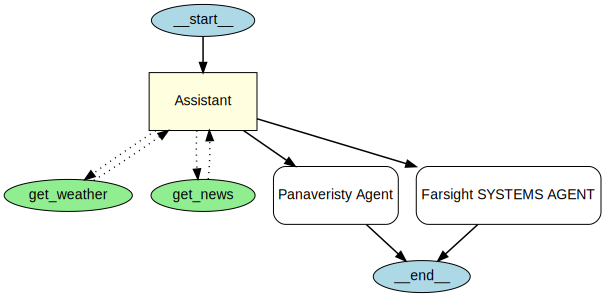

In [16]:
from agents.extensions.visualization import draw_graph

draw_graph(agent)
